In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

In [2]:
df = pd.read_csv('data.csv', encoding = 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 22.7+ MB


In [4]:
# check for missing values for each colunm
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [5]:
# check out rows with missing columns
df[df.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [6]:
# change the invoiceDate format  from String to Timestamp format
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [7]:
# change Description column from Upper Case to Lower Case 
# to match all other columns in the dataset that are of type object
df['Description'] = df.Description.str.lower()

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Remove Rows with Missing Values

In [9]:
# df_new without missing values
df_new = df.dropna()

In [10]:
# check missing values for each column
df_new.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 21.7+ MB


In [12]:
# change column type String to Int
df_new['CustomerID'] = df_new['CustomerID'].astype('Int64')

C:\Users\A.A.O\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null int64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 21.7+ MB


In [15]:
# the .describe() function only return values for the int and float columns 
df_new.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


In [16]:
# since it is not possible to sell a negative value of product,
# then it must be a mistake or error in the dataset and can be removed

# remove negative values from quantity

df_new = df_new[df_new.Quantity > 0]

In [17]:
df_new.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


#### Add a new column - AmountSpent

In [18]:
df_new['AmountSpent'] = df_new['UnitPrice'] * df_new['Quantity']

In [19]:
# rearrage for easy reference

df_new = df_new[['InvoiceNo', 'InvoiceDate', 'StockCode', 'Description', 'Quantity',
                 'UnitPrice', 'AmountSpent', 'CustomerID', 'Country']]

### Add the columns - Month, Day, Hour for the Invoice

In [20]:
# to insert year
df_new.insert(loc=2, column='YearMonth', value=df_new['InvoiceDate'].map(lambda a: 100*a.year + a.month))
# to insert month
df_new.insert(loc=3, column='Month', value=df_new['InvoiceDate'].dt.month)
# to insert day
df_new.insert(loc=4, column='Day', value=(df_new['InvoiceDate'].dt.dayofweek)+1)
# to insert hour
df_new.insert(loc=5, column='Hour', value=df_new['InvoiceDate'].dt.hour)

In [21]:
df_new.insert(loc=6, column='Minutes', value=df_new['InvoiceDate'].dt.minute)

In [22]:
df_new.head()

,InvoiceNo,InvoiceDate,YearMonth,Month,Day,Hour,Minutes,StockCode,Description,Quantity,UnitPrice,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,3,8,26,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,26,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,26,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,26,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,26,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


### Exploratory Data Analysis (EDA) 


##### How many Orders were made by the customer?

In [23]:
df_new.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


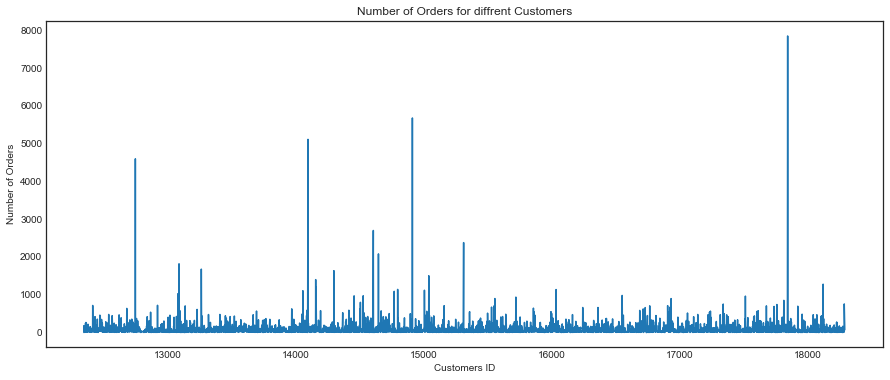

In [24]:
orders = df_new.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for diffrent Customers')
plt.show()

Check TOP 5 Most Number of Orders

In [25]:
print('The TOP 5 Most Number Of Orders ')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 Most Number Of Orders 


,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


### How Much money was spent by the customers


In [26]:
money_spent = df_new.groupby(by=['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum()

In [27]:
print('The TOP 5 Customer with the highest Money Spent ...')
money_spent.sort_values(by='AmountSpent', ascending=False).head()

The TOP 5 Customer with the highest Money Spent ...


,CustomerID,Country,AmountSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


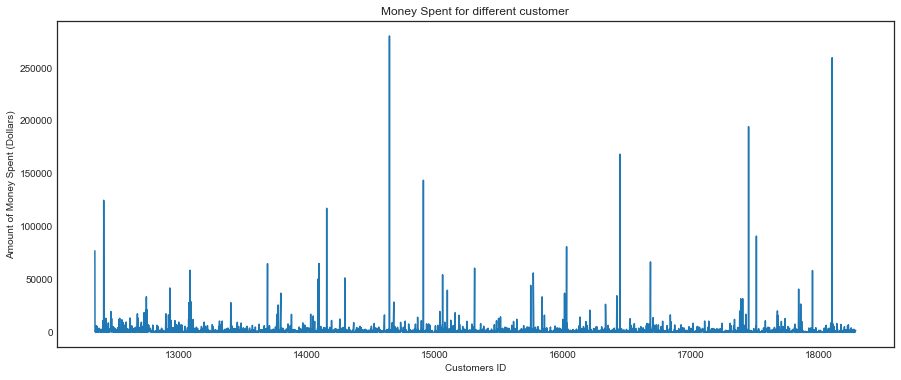

In [28]:
plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.AmountSpent)
plt.xlabel('Customers ID')
plt.ylabel('Amount of Money Spent (Dollars)')
plt.title('Money Spent for different customer')
plt.show()

In [29]:
df_new.head()

,InvoiceNo,InvoiceDate,YearMonth,Month,Day,Hour,Minutes,StockCode,Description,Quantity,UnitPrice,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,3,8,26,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,26,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,26,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,26,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,26,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


#### How Many Orders Per Month?

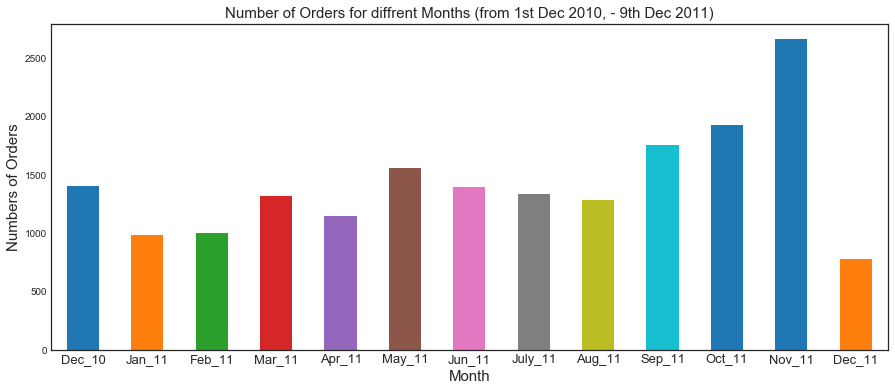

In [30]:
ax = df_new.groupby('InvoiceNo')['YearMonth'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Numbers of Orders', fontsize=15)
ax.set_title('Number of Orders for diffrent Months (from 1st Dec 2010, - 9th Dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11',
                    'Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

#### How Many Orders Per day?

In [31]:
df_new.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index()

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: Day, dtype: int64

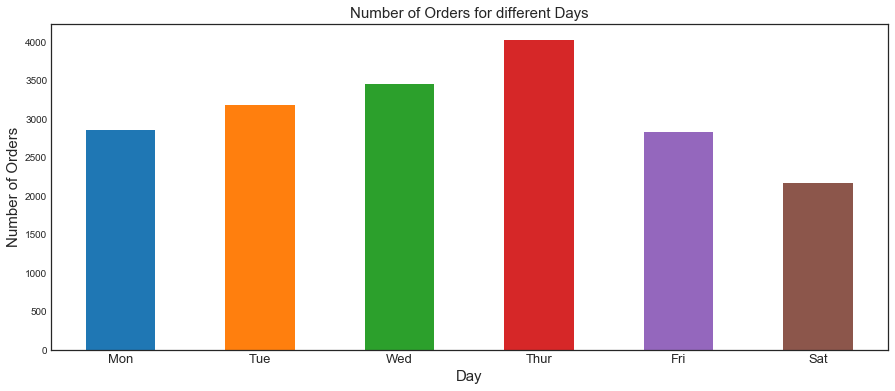

In [32]:
ax = df_new.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot('bar', figsize=(15,6))
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders for different Days', fontsize=15)
ax.set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'), rotation='horizontal', fontsize=13)
plt.show()

#### How many Orders per Hour?

In [33]:
df_new.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index()

[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: Hour, dtype: int64

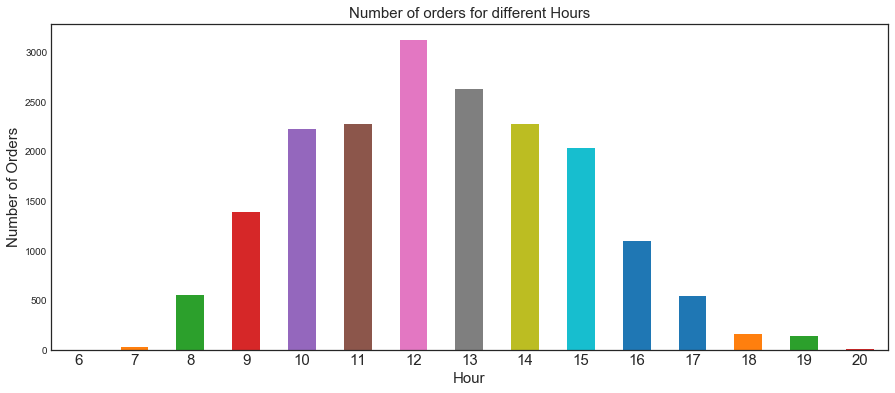

In [34]:
ax = df_new.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar', figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

##### How many Orders were made per minute

In [35]:
item_sold_per_minute = df_new.groupby('InvoiceNo')['Minutes'].unique().value_counts().iloc[:-1]

#### Discover Pattern for unit Price 

In [36]:
df_new.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

Well it looks as if there are some free item given to customer as unitPrice=0

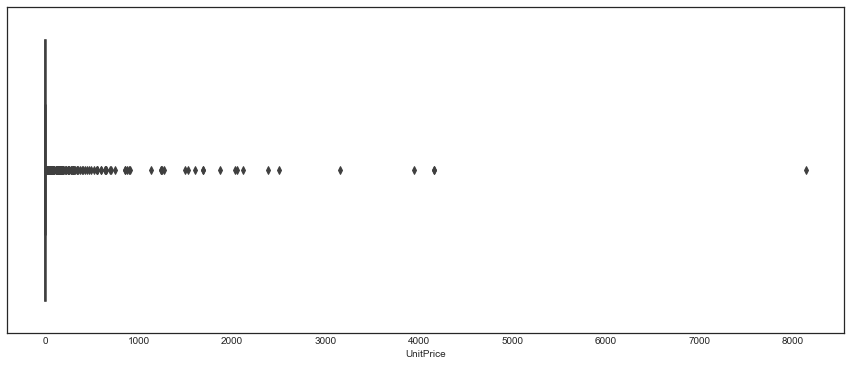

In [37]:
# check the distribution of Unit prce
plt.subplots(figsize=(15,6))
sns.boxplot(df_new['UnitPrice'])
plt.show()

In [38]:
# to get the free items ,
df_free = df_new[df_new['UnitPrice'] == 0]
df_free.head()

,InvoiceNo,InvoiceDate,YearMonth,Month,Day,Hour,Minutes,StockCode,Description,Quantity,UnitPrice,AmountSpent,CustomerID,Country
9302,537197,2010-12-05 14:02:00,201012,12,7,14,2,22841,round cake tin vintage green,1,0.0,0.0,12647,Germany
33576,539263,2010-12-16 14:36:00,201012,12,4,14,36,22580,advent calendar gingham sack,4,0.0,0.0,16560,United Kingdom
40089,539722,2010-12-21 13:45:00,201012,12,2,13,45,22423,regency cakestand 3 tier,10,0.0,0.0,14911,EIRE
47068,540372,2011-01-06 16:41:00,201101,1,4,16,41,22090,paper bunting retrospot,24,0.0,0.0,13081,United Kingdom
47070,540372,2011-01-06 16:41:00,201101,1,4,16,41,22553,plasters in tin skulls,24,0.0,0.0,13081,United Kingdom


##### now that we have a dataframe of item sold for free 
##### we can get which year, month, day or hour it was sold


In [39]:
df_free.YearMonth.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: YearMonth, dtype: int64

In [40]:
df_free.Month.value_counts().sort_index()

1      3
2      1
3      2
4      2
5      2
7      2
8      6
9      2
10     3
11    14
12     3
Name: Month, dtype: int64

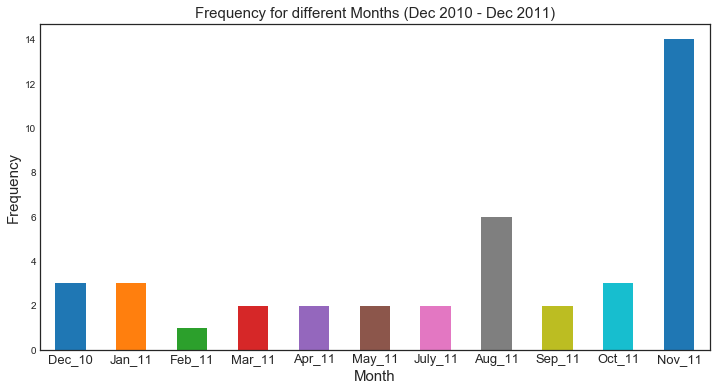

In [41]:
ax = df_free.YearMonth.value_counts().sort_index().plot('bar', figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

From the chart above, the company gives 2 - 4 free item every month except June 2011

#### Discover Patterns for each Country

In [42]:
df_new.head()

,InvoiceNo,InvoiceDate,YearMonth,Month,Day,Hour,Minutes,StockCode,Description,Quantity,UnitPrice,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,3,8,26,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,26,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,26,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,26,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,26,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


#### How many orders for each Country



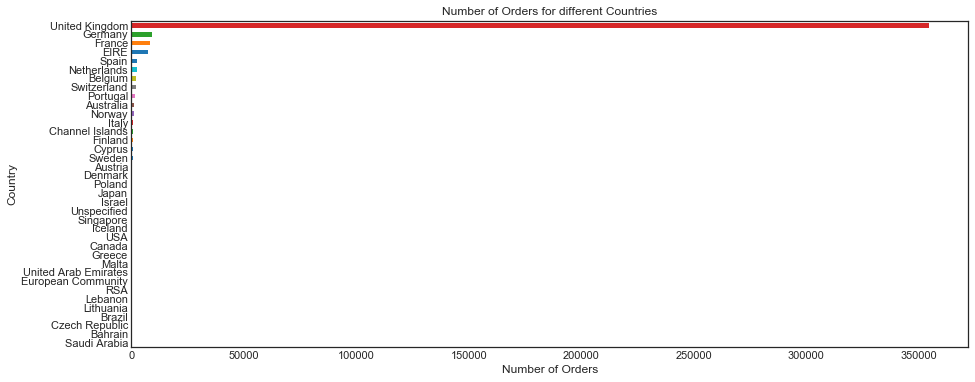

In [43]:
group_country_order = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
plt.subplots(figsize=(15,6))
group_country_order.plot('barh', fontsize=11)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

#### We need to redraw the above chart because of the value of country United Kingdom to properly see the number of order in each country

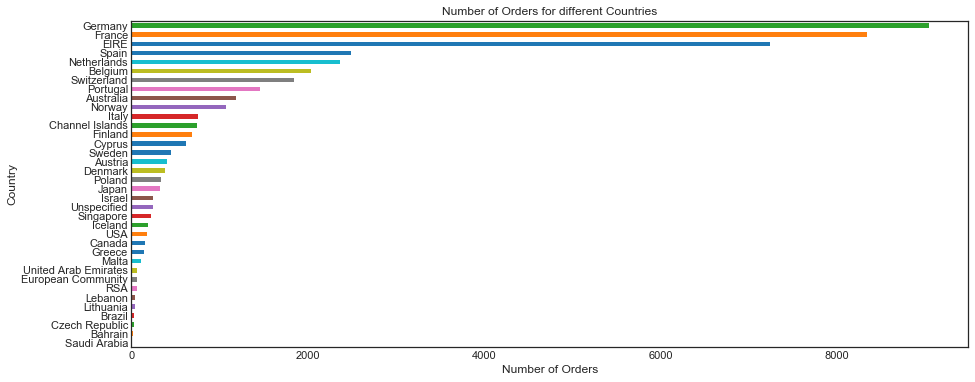

In [44]:
group_country_order = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_order['United Kingdom']

#plot for each country without UK
plt.subplots(figsize=(15,6))
group_country_order.plot('barh', fontsize=11)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

#### How much money was spent by each Country

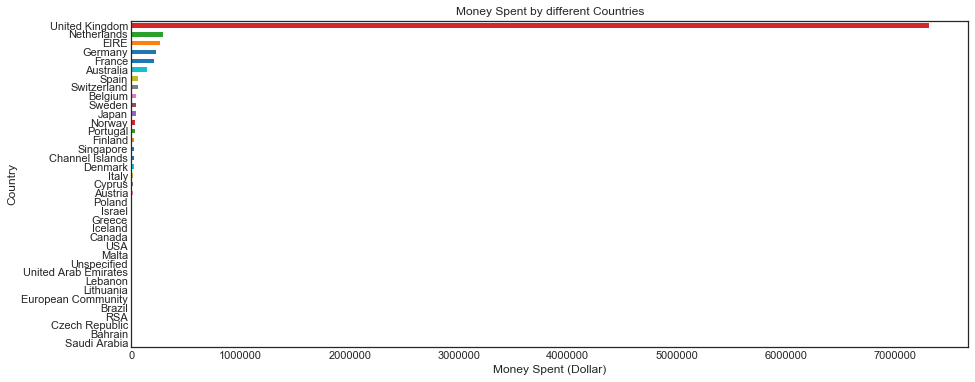

In [45]:
group_country_amount_spent = df_new.groupby('Country')['AmountSpent'].sum().sort_values()

plt.subplots(figsize=(15,6))
group_country_amount_spent.plot('barh', fontsize=11)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

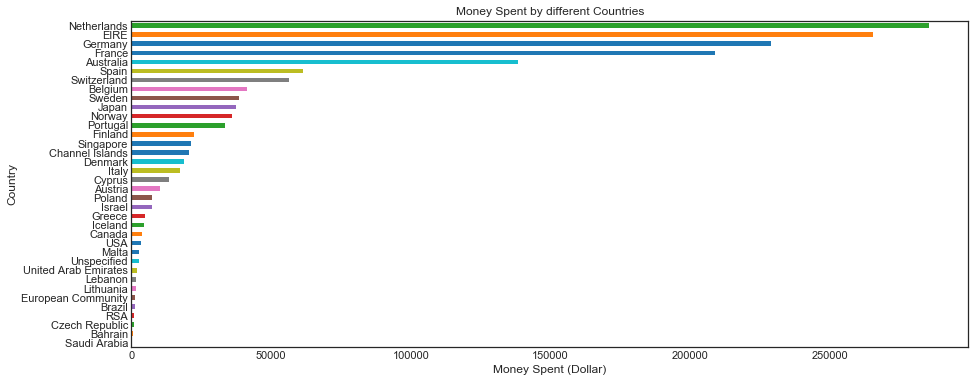

In [46]:
group_country_amount_spent = df_new.groupby('Country')['AmountSpent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot for each country without UK
plt.subplots(figsize=(15,6))
group_country_amount_spent.plot('barh', fontsize=11)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

Thank You 
If you have any questions please fell free to ask or send mail to alaroabubakarolayemi@yahoo.com

Credit to Admond Lee 

Remember. Creativity is your limit when doing EDA. And it really depends on your business understanding, curiosity to ask interesting questions to challenge and validate assumptions, as well as your intuition.

Admomd Lee's work on Kaggle can be found @ https://www.kaggle.com/admond1994/e-commerce-data-eda/notebook

For More Insight and Non Technical Explanation of the results
And his result explanation is on https://towardsdatascience.com/exploratory-data-analysis-on-e-commerce-data-be24c72b32b2